In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/dataset.xlsx'
data = pd.read_excel(file_path)


In [ ]:
pd.set_option("display.max_columns", 111)
pd.set_option("display.max_rows",111)

In [ ]:
data.head(10)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
((data.isna().sum()/data.shape[0])*100).sort_values(ascending= False)

Urine - Sugar                                            100.000000
Mycoplasma pneumoniae                                    100.000000
Partial thromboplastin time (PTT)                        100.000000
Prothrombin time (PT), Activity                          100.000000
D-Dimer                                                  100.000000
Fio2 (venous blood gas analysis)                          99.982282
Urine - Nitrite                                           99.982282
Vitamin B12                                               99.946846
Lipase dosage                                             99.858257
Albumin                                                   99.769667
Phosphor                                                  99.645641
Arteiral Fio2                                             99.645641
Ferritin                                                  99.592488
Arterial Lactic Acid                                      99.521616
ctO2 (arterial blood gas analysis)              

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [ ]:
data.shape[0]

5644

In [ ]:
data.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

In [ ]:
data.select_dtypes(include ="object").shape

(5644, 37)

In [ ]:
data.select_dtypes(exclude ="object").shape

(5644, 74)

In [ ]:
numeric_vars = data.select_dtypes(include=['int', 'float'])

In [ ]:
#numeric_vars.columns.tolist()   # pour mettre sous forme de liste les colonnes des variables catégorielles
numeric_vars.shape

(5644, 74)

<h1> Visualisation de la variables cible </h1>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

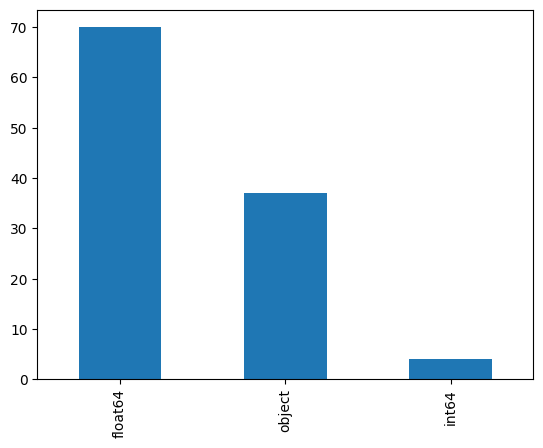

In [ ]:
data.dtypes.value_counts().plot.bar()

In [ ]:
data = data[data.columns[data.isna().sum()/data.shape[0] < 0.9]]

In [ ]:
data.columns.shape

(39,)

In [ ]:
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


In [ ]:
data = data.drop("Patient ID", axis =1)

In [ ]:
data.shape

(5644, 38)

<Axes: ylabel='SARS-Cov-2 exam result'>

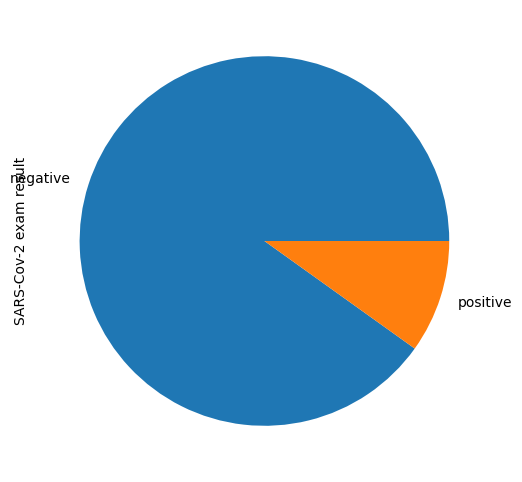

In [ ]:
plt.figure(figsize =(6,6))
data["SARS-Cov-2 exam result"].value_counts().plot.pie()

In [ ]:
data["SARS-Cov-2 exam result"].value_counts(normalize = True)*100

negative    90.113395
positive     9.886605
Name: SARS-Cov-2 exam result, dtype: float64

<h1> Histogramme des valeurs continues </h1>

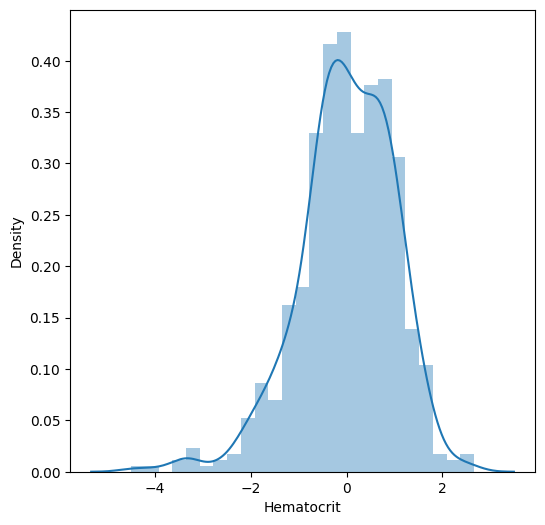

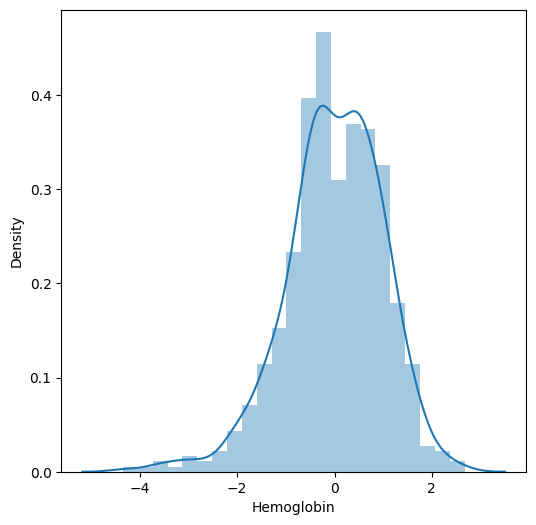

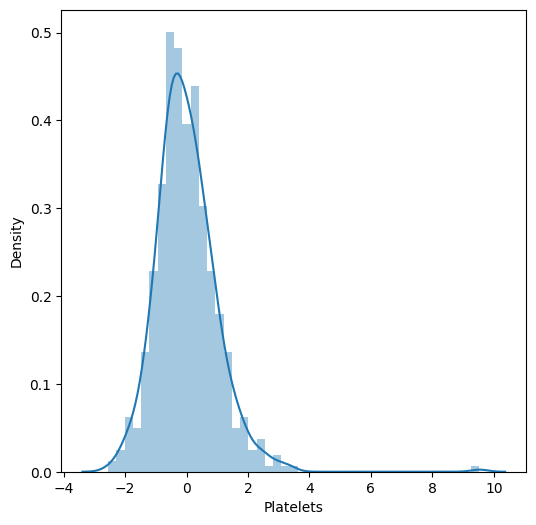

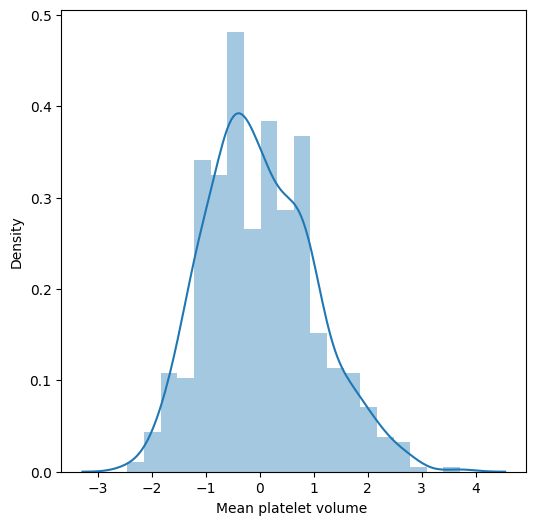

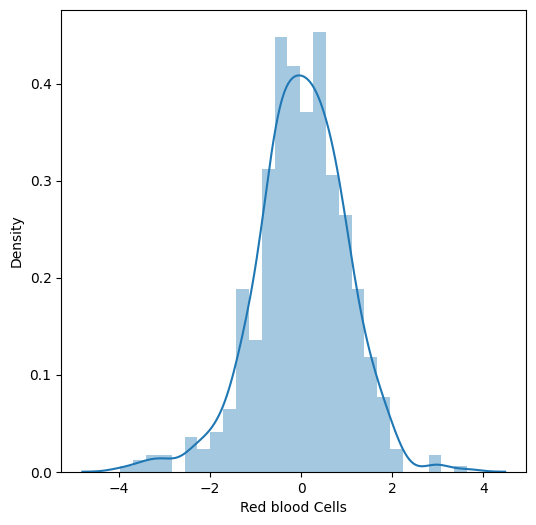

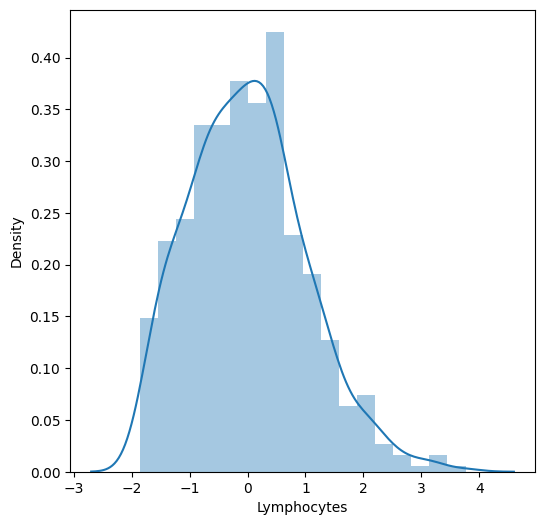

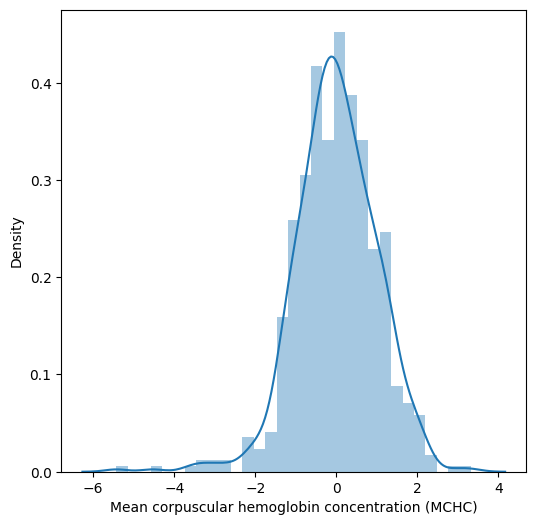

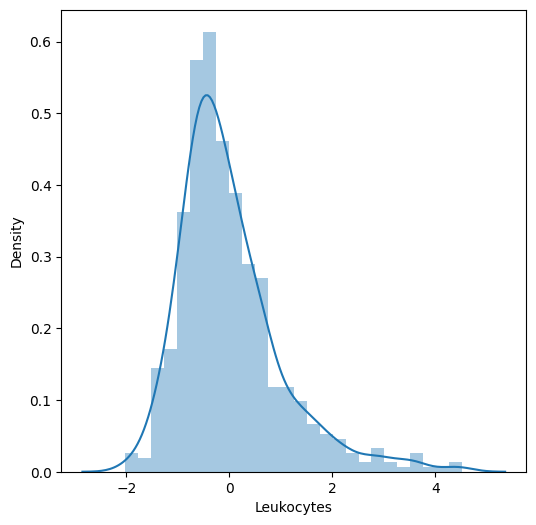

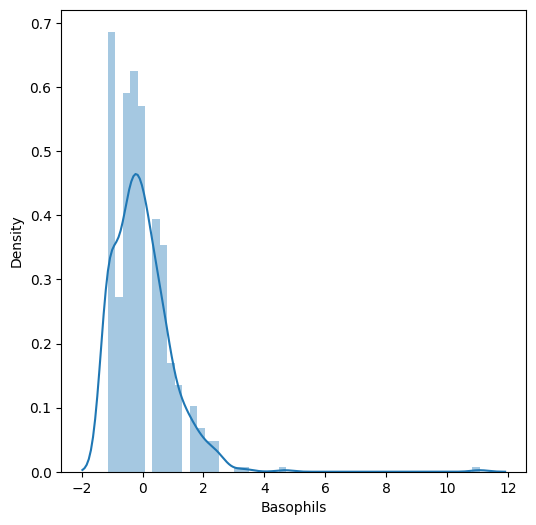

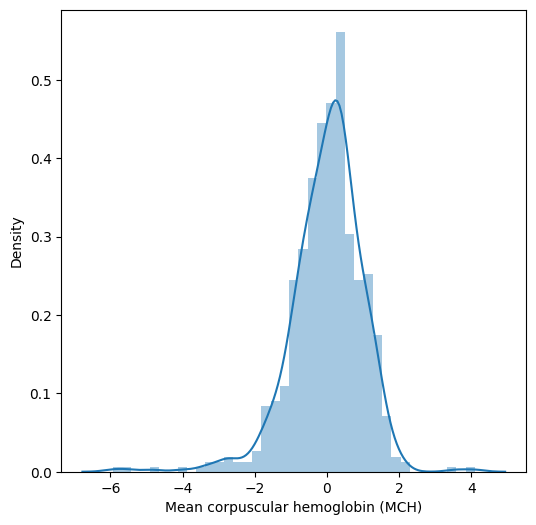

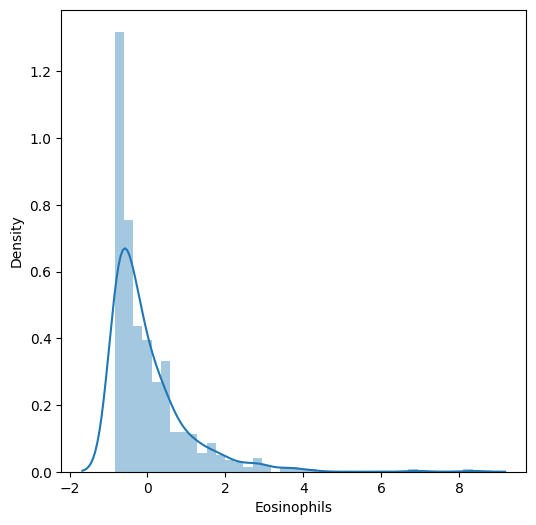

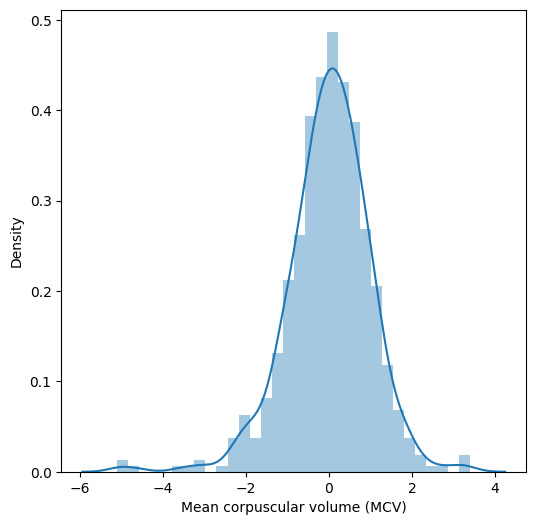

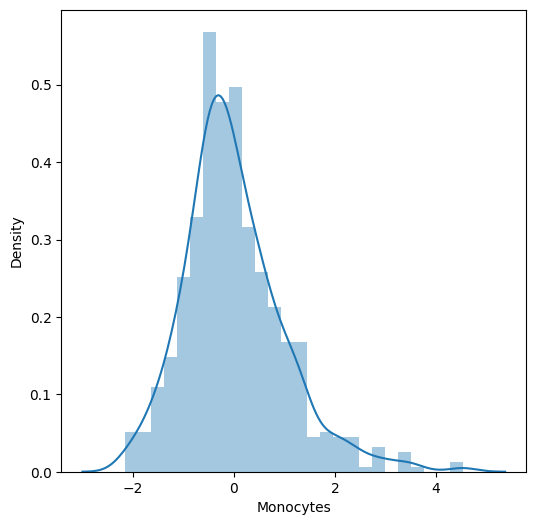

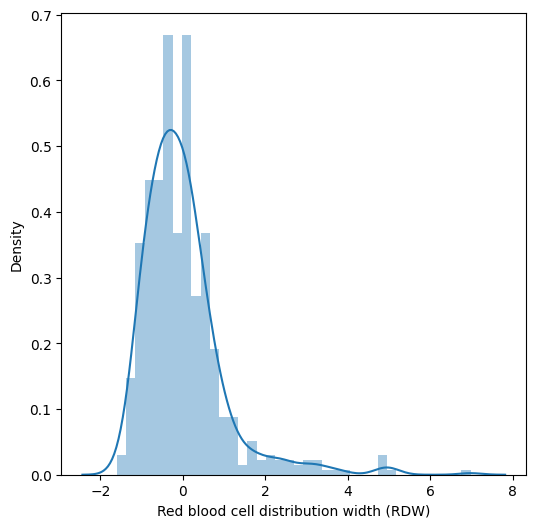

In [ ]:
for col in data.select_dtypes('float'):
  plt.figure(figsize=(6,6))
  sns.distplot(data[col])

<Axes: xlabel='Patient age quantile', ylabel='Density'>

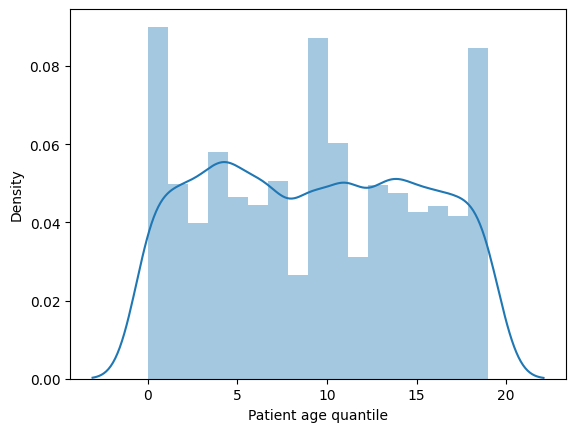

In [ ]:
sns.distplot(data['Patient age quantile'])

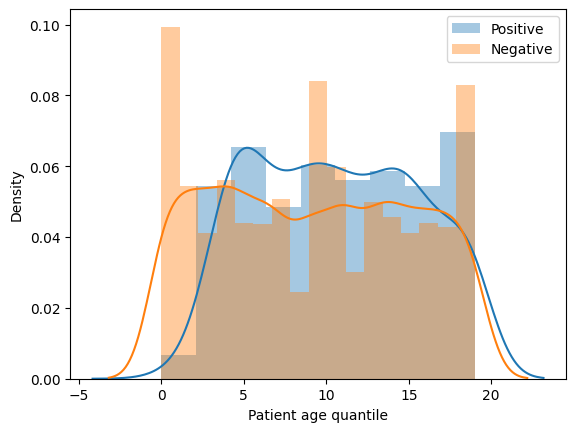

In [ ]:
plt.figure()
sns.distplot(data_positive['Patient age quantile'], label = 'Positive')
sns.distplot(data_negative['Patient age quantile'], label = 'Negative')
plt.legend()

In [ ]:
data_positive['Patient age quantile'].shape[0]

558

In [ ]:
data_negative['Patient age quantile'].shape

(5086,)

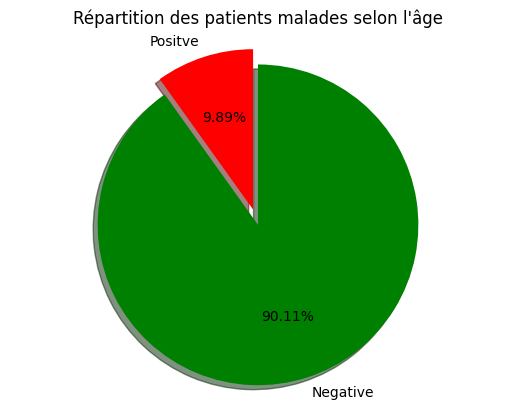

In [ ]:
import matplotlib.pyplot as plt

# Compter le nombre de patients malades et en bonne santé
sick_count = data_positive['Patient age quantile'].shape[0]
healthy_count = data_negative['Patient age quantile'].shape[0]

# Créer le graphique en camembert
labels = ['Positve', 'Negative']
sizes = [sick_count, healthy_count]
colors = ['red', 'green']
explode = (0.1, 0)  # Permet de faire ressortir la part "positive" du graphique

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=90)
plt.axis('equal')  # Assure que le graphique soit circulaire
plt.title("Répartition des patients malades selon l'âge")

plt.show()


<Axes: xlabel='Patient age quantile', ylabel='count'>

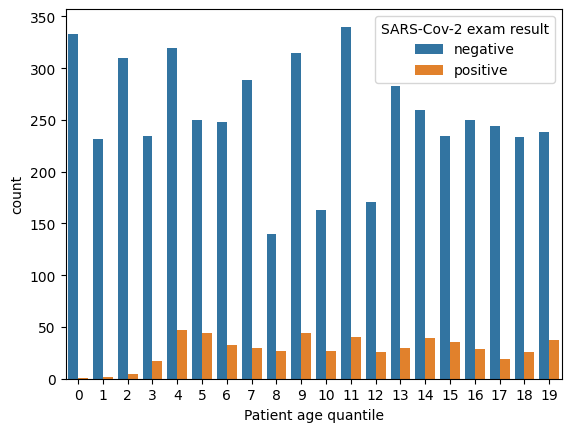

In [ ]:
sns.countplot(x = 'Patient age quantile', hue ='SARS-Cov-2 exam result', data = data)

In [ ]:
for col in data.select_dtypes('object'):
  print(f'{col :-<40}> {data[col].unique()}')

SARS-Cov-2 exam result------------------> ['negative' 'positive']
Respiratory Syncytial Virus-------------> [nan 'not_detected' 'detected']
Influenza A-----------------------------> [nan 'not_detected' 'detected']
Influenza B-----------------------------> [nan 'not_detected' 'detected']
Parainfluenza 1-------------------------> [nan 'not_detected' 'detected']
CoronavirusNL63-------------------------> [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus------------------> [nan 'detected' 'not_detected']
Coronavirus HKU1------------------------> [nan 'not_detected' 'detected']
Parainfluenza 3-------------------------> [nan 'not_detected' 'detected']
Chlamydophila pneumoniae----------------> [nan 'not_detected' 'detected']
Adenovirus------------------------------> [nan 'not_detected' 'detected']
Parainfluenza 4-------------------------> [nan 'not_detected' 'detected']
Coronavirus229E-------------------------> [nan 'not_detected' 'detected']
CoronavirusOC43-------------------------> [nan

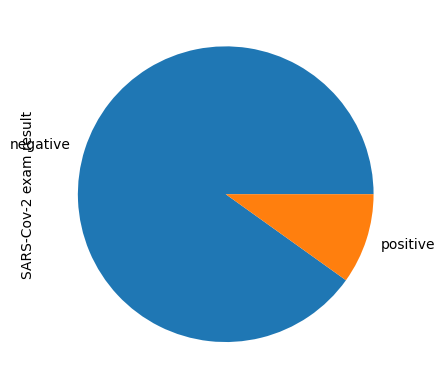

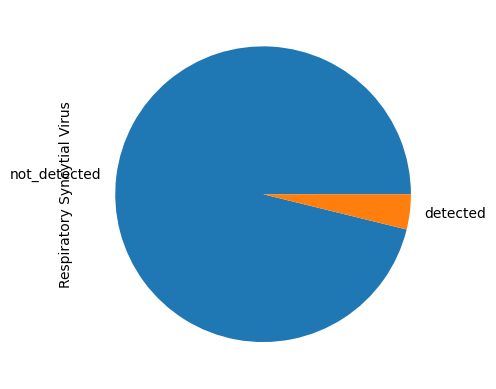

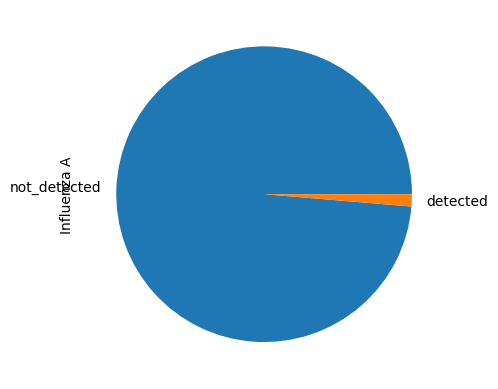

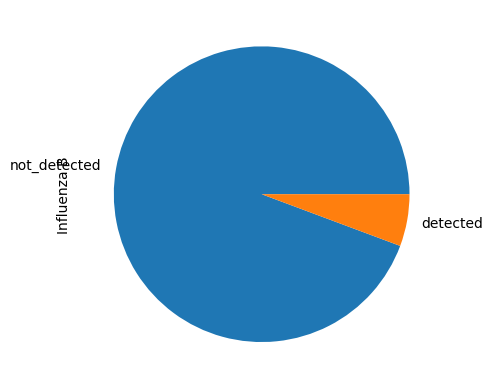

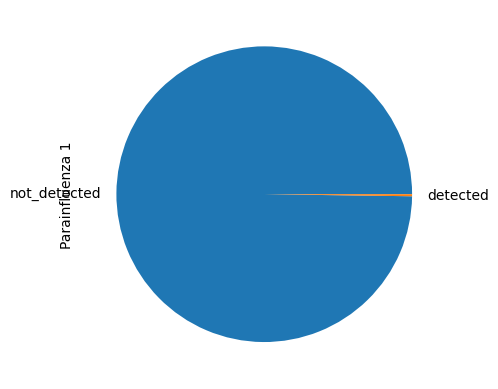

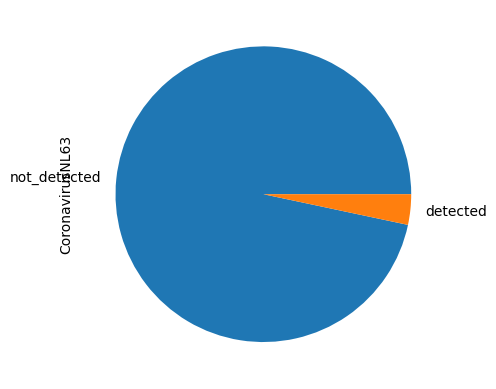

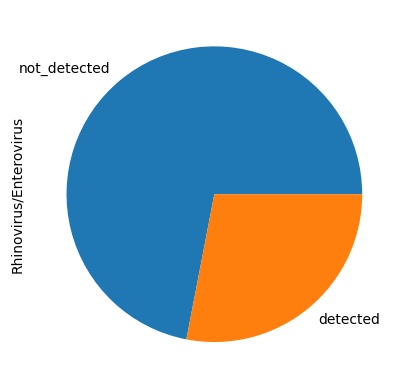

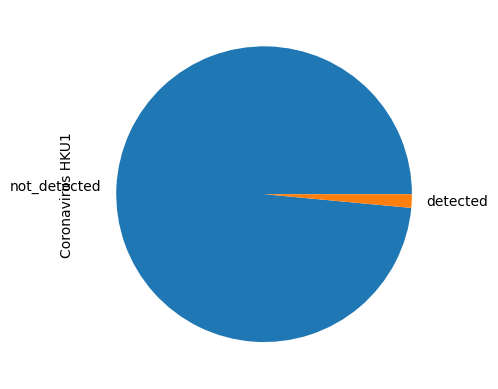

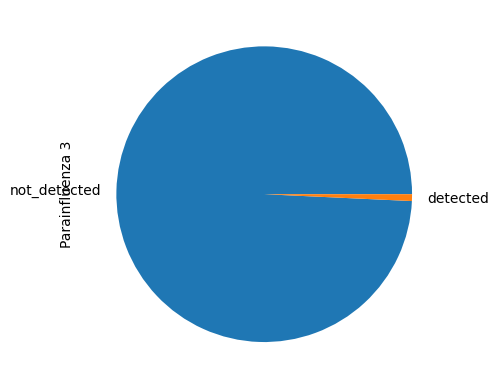

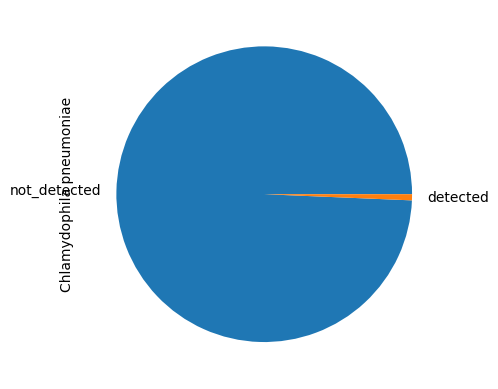

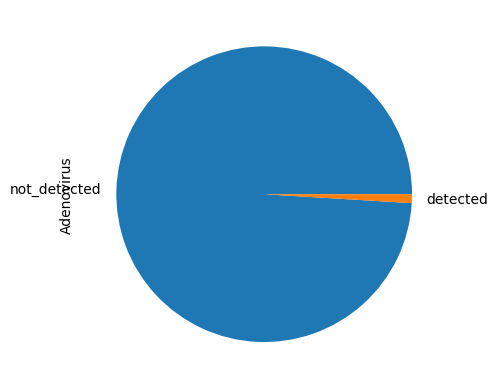

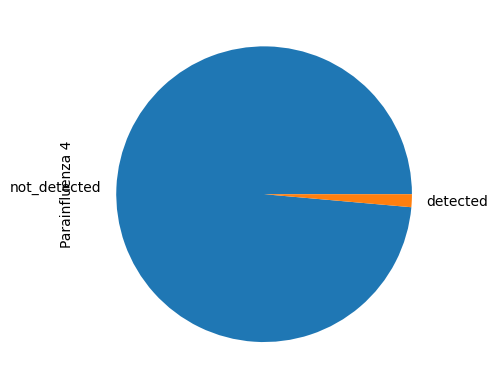

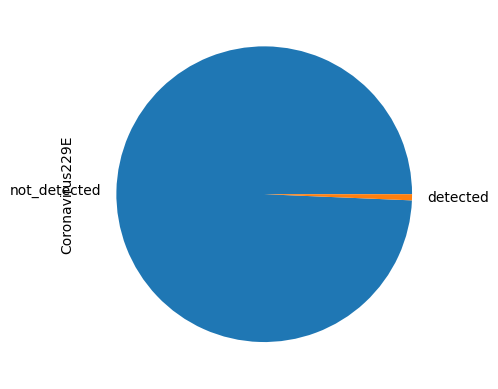

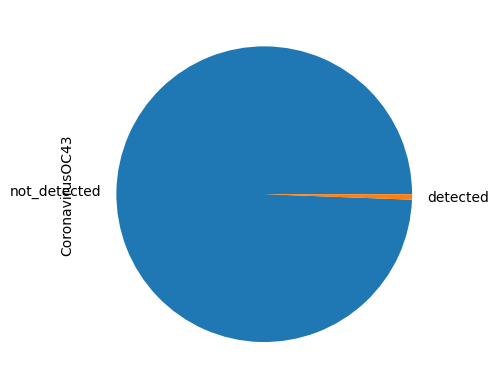

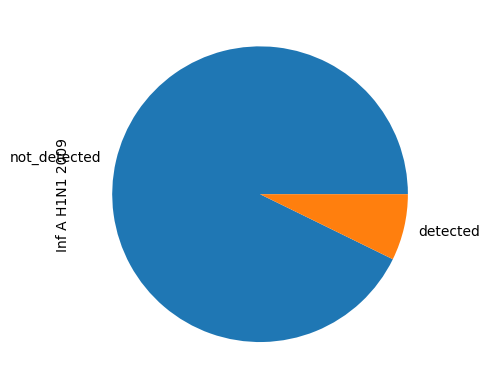

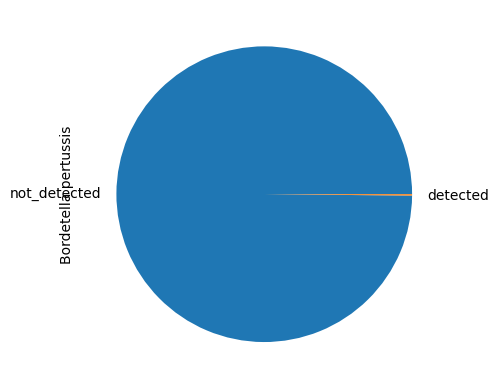

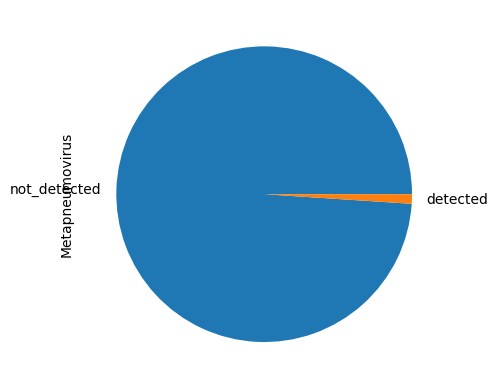

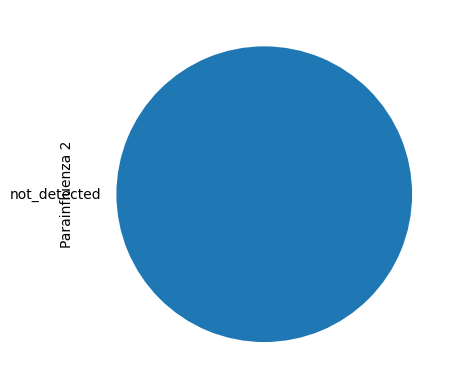

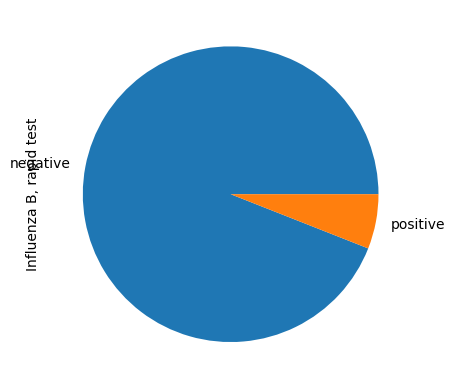

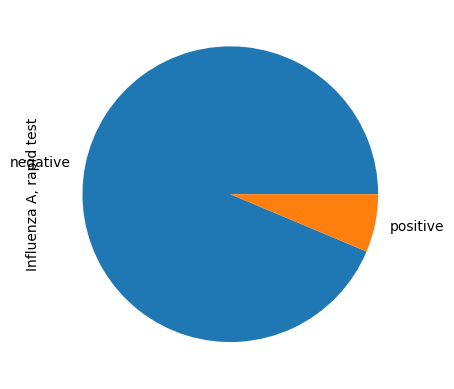

In [ ]:
for col in data.select_dtypes('object'):
  plt.figure()
  data[col].value_counts().plot.pie()

In [ ]:
data['Rhinovirus/Enterovirus'].value_counts(normalize = True)

not_detected    0.719675
detected        0.280325
Name: Rhinovirus/Enterovirus, dtype: float64

In [ ]:
data = data.drop('Parainfluenza 2', axis = 1)

In [ ]:
data.isna().sum()/data.shape[0]

Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpuscular hemoglobin (MCH)                        0.893338
Eosinophil

In [ ]:
data.columns

Index(['Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Influenza B, rapid test', 'Influenz

In [ ]:
data_positive = data[data['SARS-Cov-2 exam result']== 'positive']

In [ ]:
data_negative = data[data['SARS-Cov-2 exam result']== 'negative']

In [ ]:
missing_rate = data.isna().sum()/data.shape[0]

In [ ]:
blood_columns = data.columns[(missing_rate < 0.9) & (missing_rate >0.88)]

In [ ]:
viral_columns = data.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

In [ ]:
import warnings

# Ignorer tous les avertissements
warnings.filterwarnings("ignore")

# Rétablir les avertissements
#warnings.filterwarnings("default")


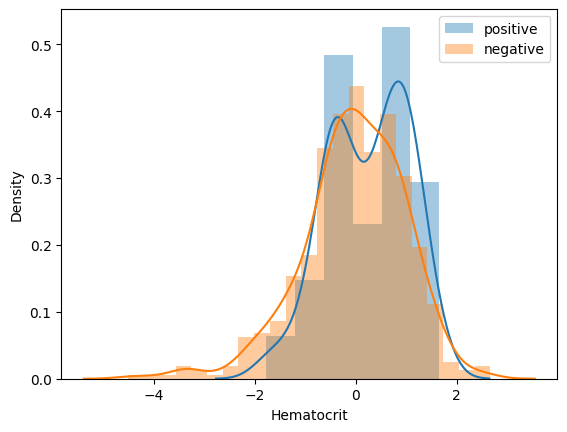

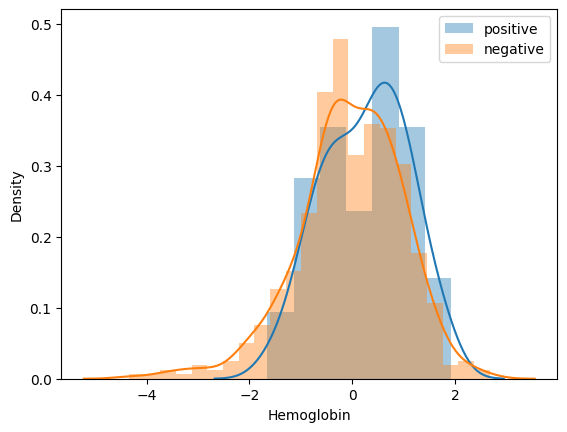

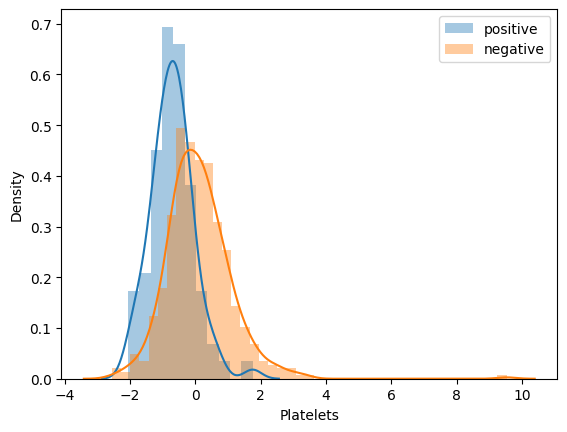

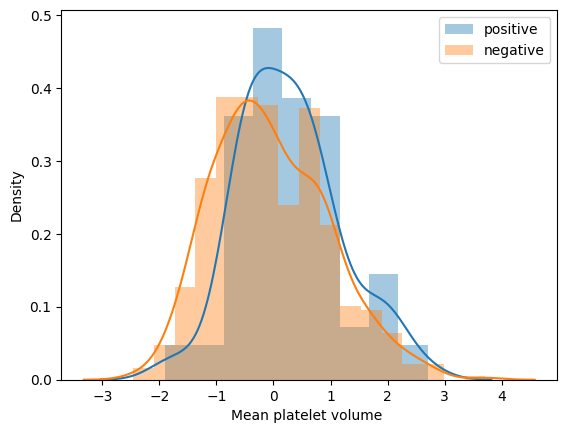

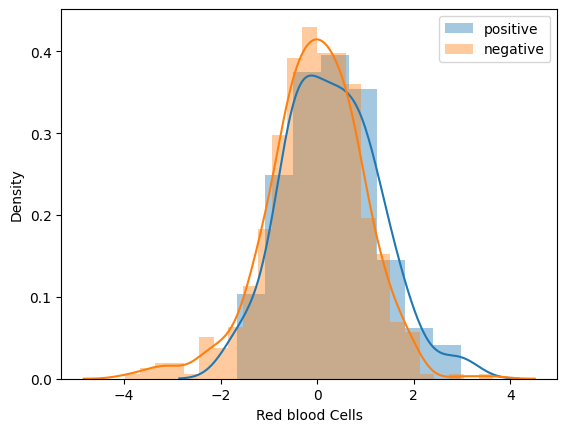

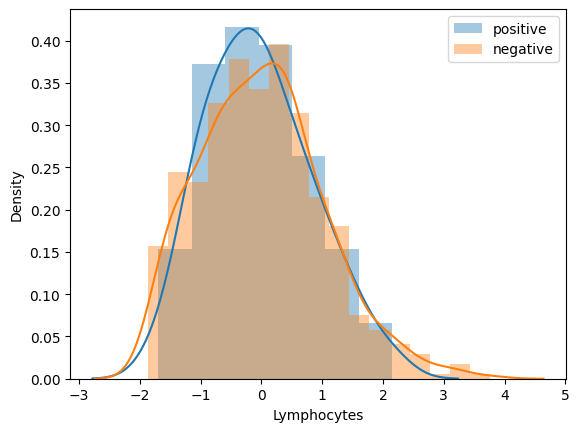

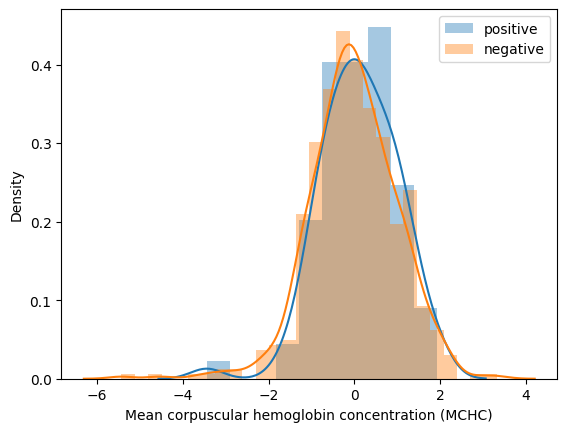

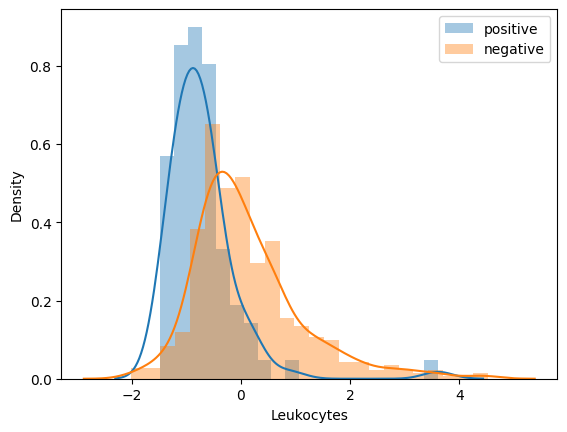

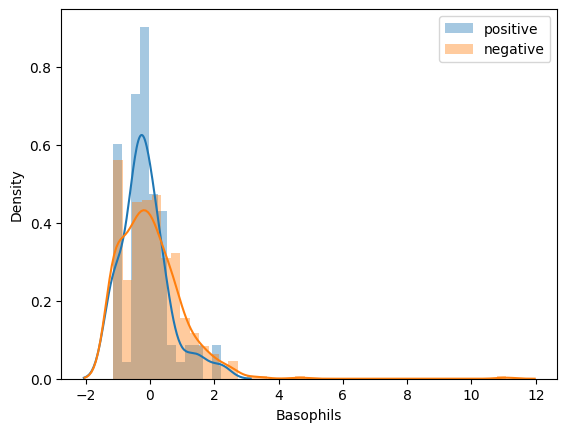

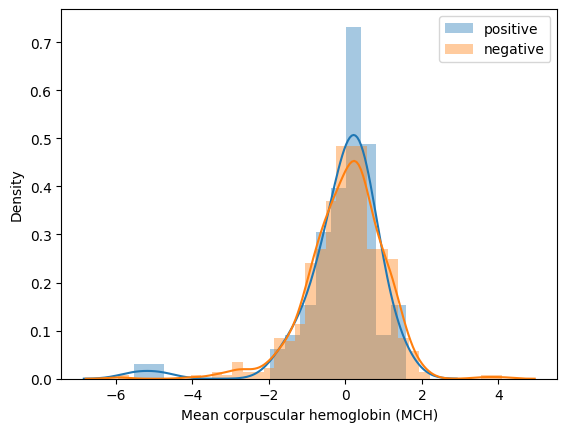

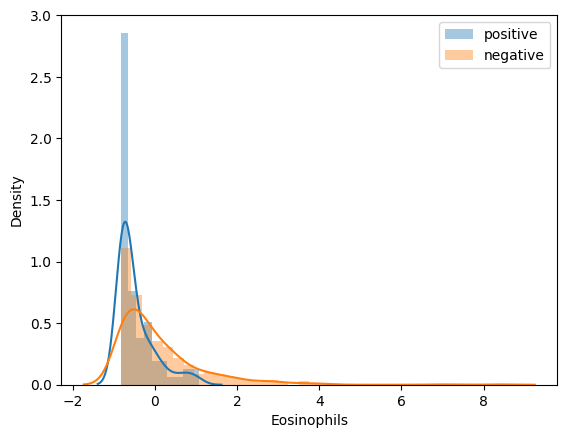

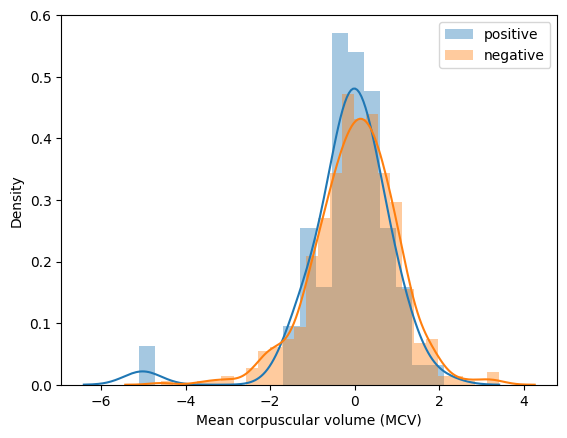

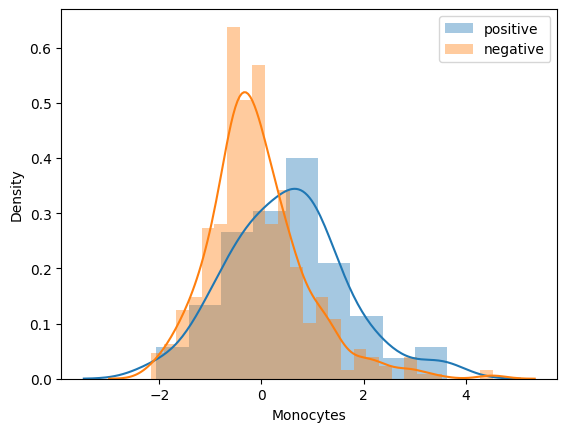

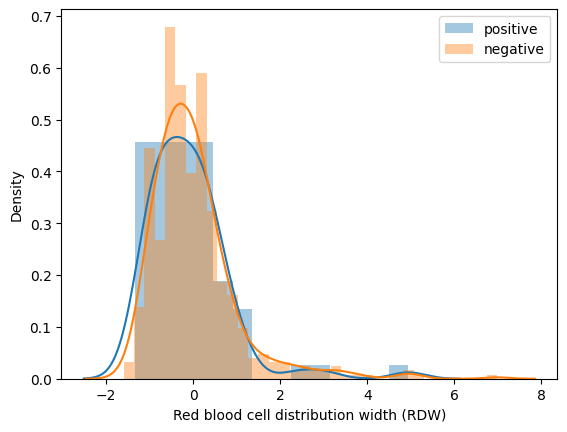

In [ ]:
for col in colonne_sang:
    plt.figure()
    sns.distplot(data_positive[col], label='positive')
    sns.distplot(data_negative[col], label='negative')
    plt.legend()

In [ ]:
data.nunique()

Patient age quantile                                      20
SARS-Cov-2 exam result                                     2
Patient addmited to regular ward (1=yes, 0=no)             2
Patient addmited to semi-intensive unit (1=yes, 0=no)      2
Patient addmited to intensive care unit (1=yes, 0=no)      2
Hematocrit                                               176
Hemoglobin                                                84
Platelets                                                249
Mean platelet volume                                      48
Red blood Cells                                          211
Lymphocytes                                              318
Mean corpuscular hemoglobin concentration (MCHC)          57
Leukocytes                                               475
Basophils                                                 17
Mean corpuscular hemoglobin (MCH)                         91
Eosinophils                                               86
Mean corpuscular volume 

In [ ]:
data = data.drop(['Patient ID','Parainfluenza 2'], axis=1)

In [ ]:
colonne_sang = data.columns[(data.nunique().values > 2) & (data.nunique().values != 20)]

In [ ]:
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [ ]:
viral_columns = data.columns[data.nunique().values == 2][4:]

In [ ]:
pd.crosstab(data['SARS-Cov-2 exam result'],data['Metapneumovirus'])

Metapneumovirus,detected,not_detected
SARS-Cov-2 exam result,,
negative,14,1226
positive,0,112


<h1> Relation entre la variable cible et les variables catégorielles </h1>

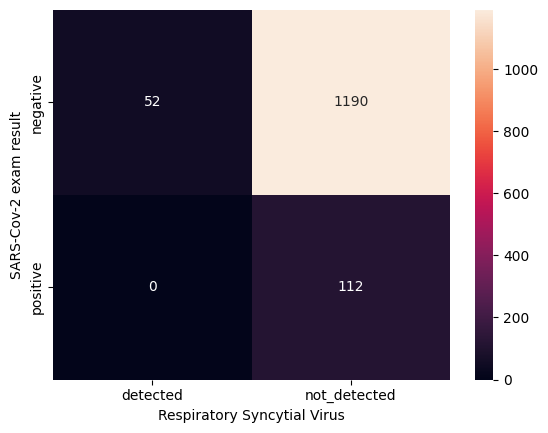

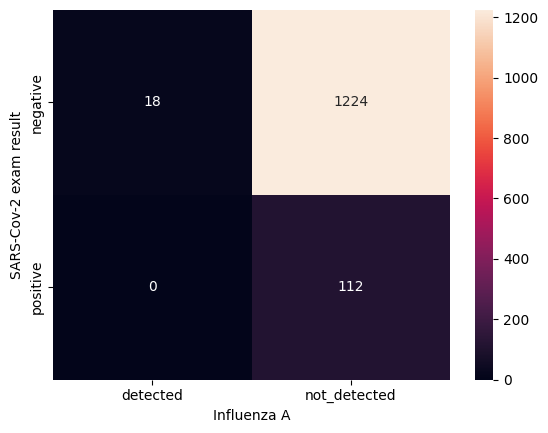

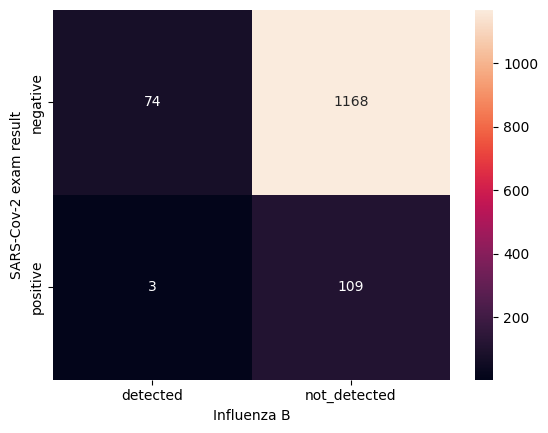

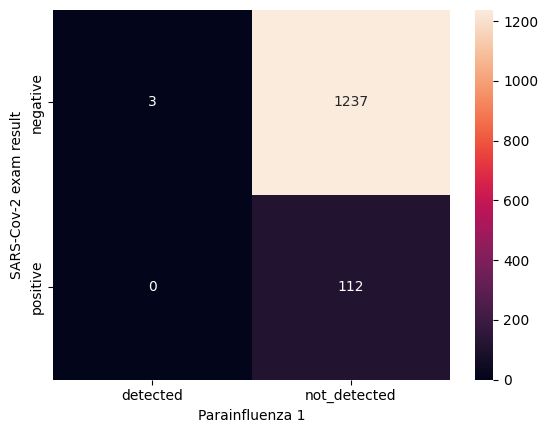

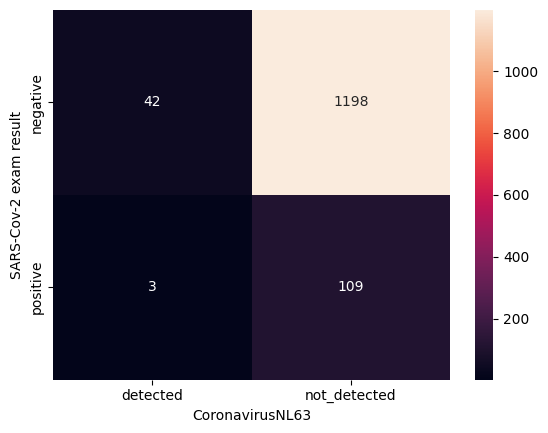

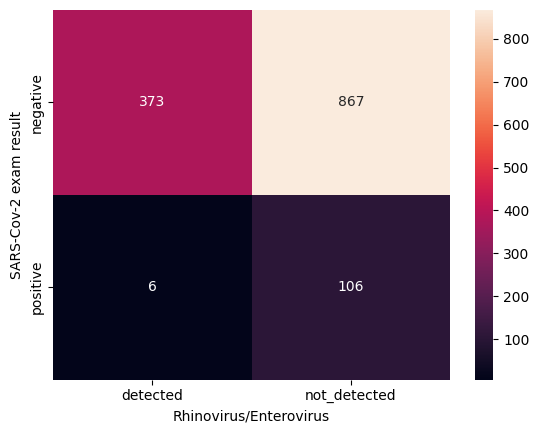

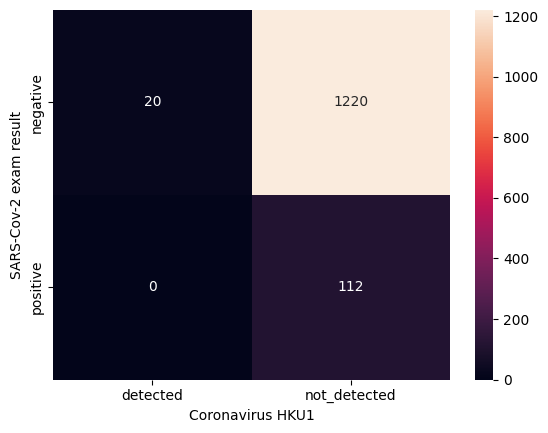

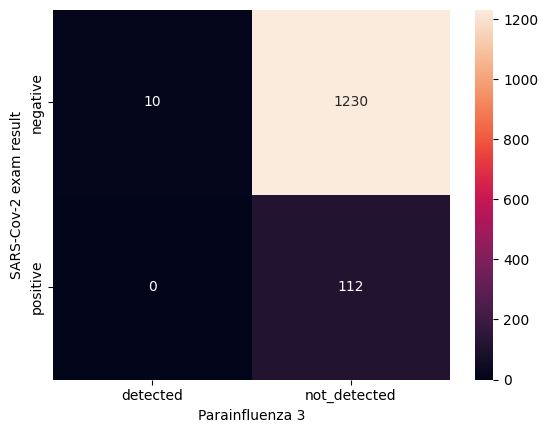

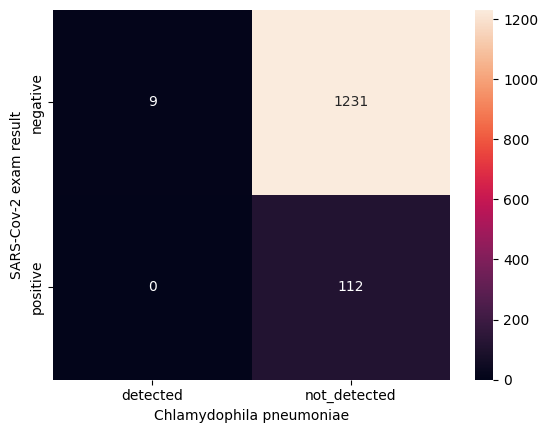

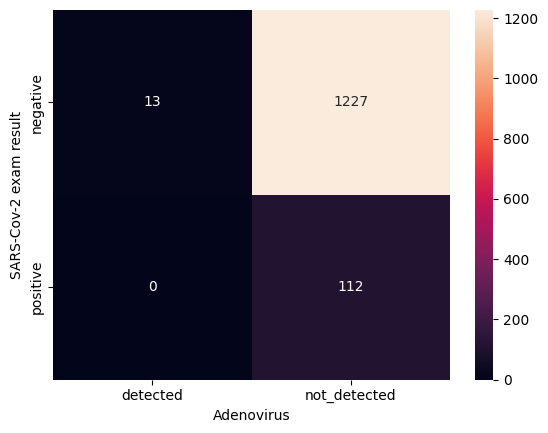

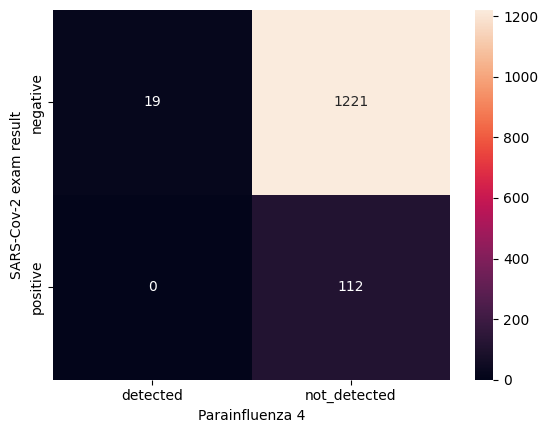

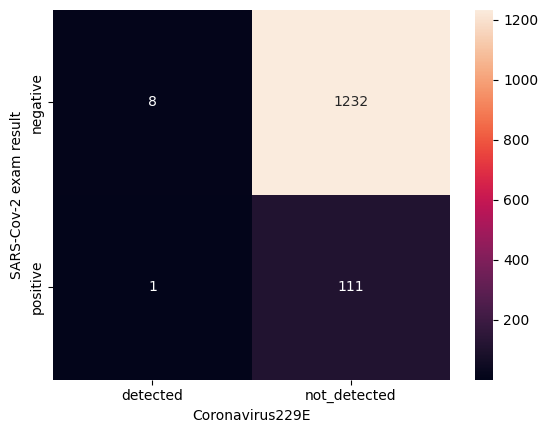

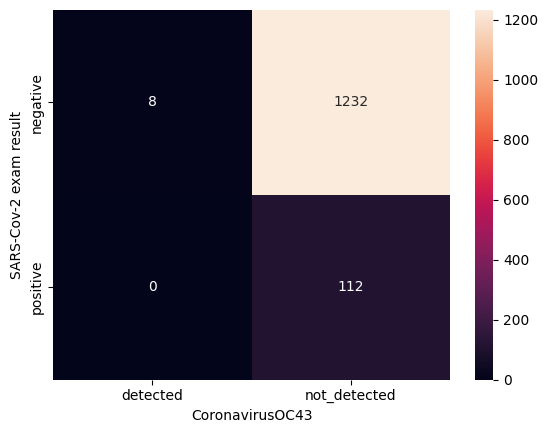

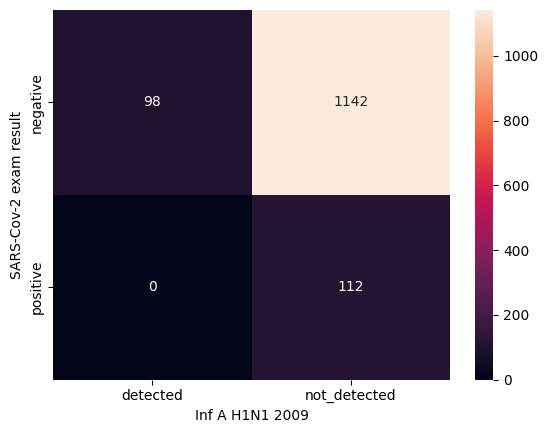

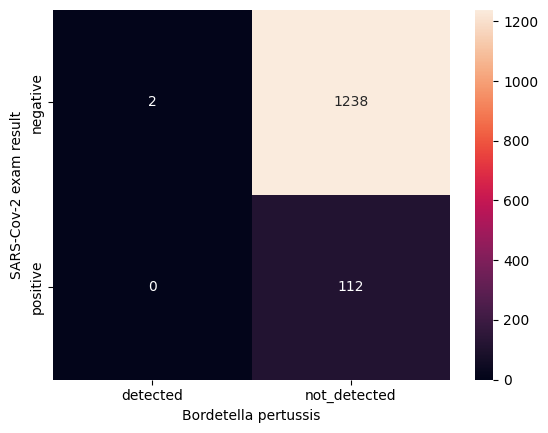

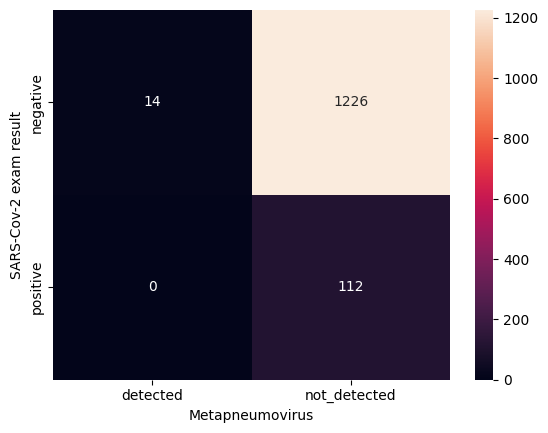

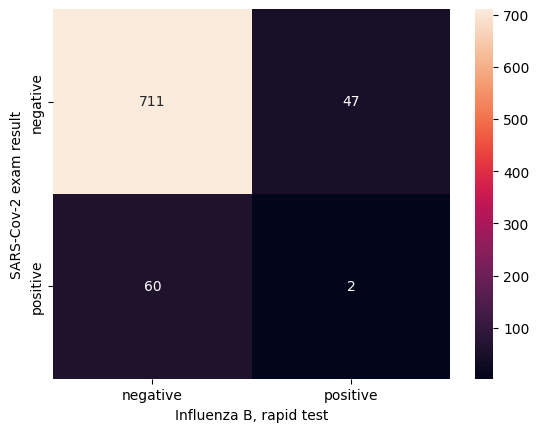

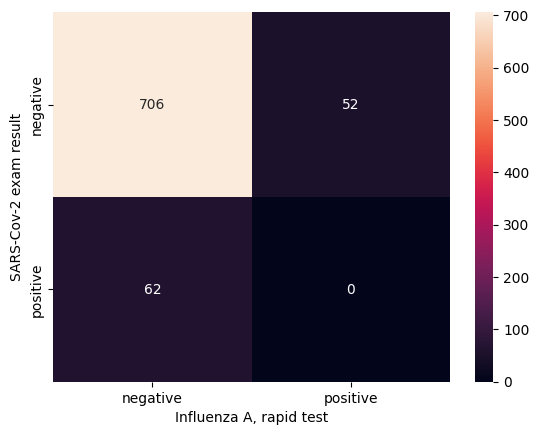

In [ ]:
for col in viral_columns:
  plt.figure()
  sns.heatmap(pd.crosstab(data['SARS-Cov-2 exam result'],data[col]), annot =True, fmt ='d')



<Axes: >

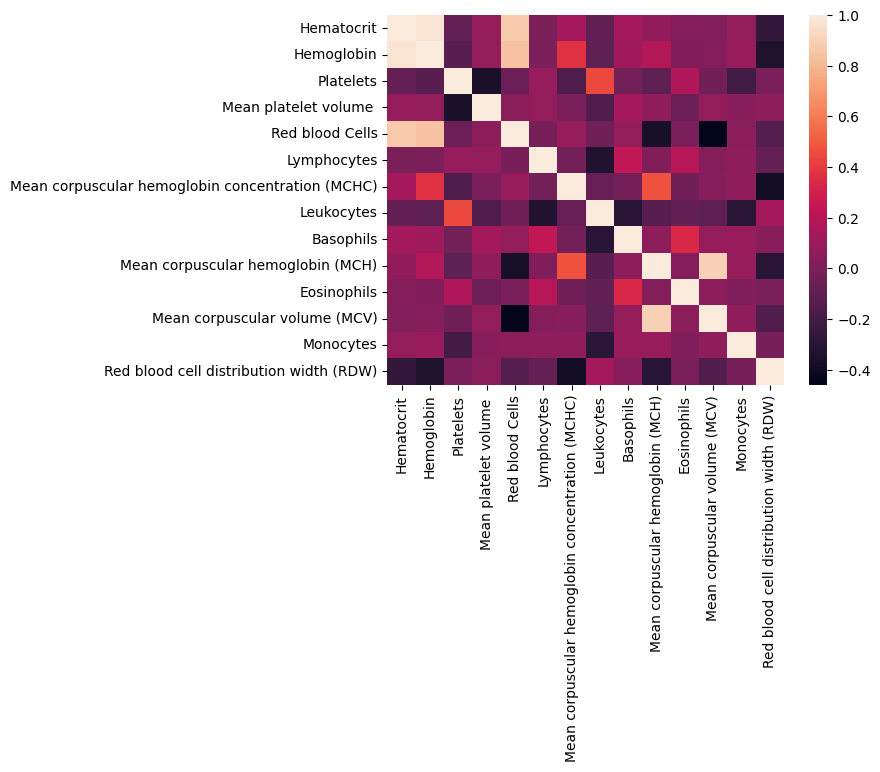

In [ ]:
plt.figure()
sns.heatmap(data[colonne_sang].corr())

In [ ]:
from scipy.stats import ttest_ind

# Comparaison des moyennes de 'Hematocrit' entre les groupes positifs et négatifs
group_positive = data[data['SARS-Cov-2 exam result'] == 'positive']
group_negative = data[data['SARS-Cov-2 exam result'] == 'negative']

t_statistic, p_value = ttest_ind(group_positive['Platelets'], group_negative['Platelets'])

print("Test t de Student - Hematocrit:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)


Test t de Student - Hematocrit:
T-statistic: nan
P-value: nan


In [ ]:
# Conversion en variables indicatrices
data_dummies = pd.get_dummies(data['Rhinovirus/Enterovirus'], prefix='Rhinovirus_Enterovirus')

# Concaténation des variables indicatrices avec le dataframe d'origine
data_with_dummies = pd.concat([data, data_dummies], axis=1)

data_with_dummies = data_with_dummies.dropna(axis = 0)
# Calcul de la corrélation avec les variables indicatrices
pearson_corr, pearson_p_value = pearsonr(data_with_dummies['Hemoglobin'], data_with_dummies['Rhinovirus_Enterovirus_detected'])
spearman_corr, spearman_p_value = spearmanr(data_with_dummies['Hemoglobin'], data_with_dummies['Rhinovirus_Enterovirus_detected'])

print("Corrélation avec Rhinovirus/Enterovirus - Hemoglobin:")
print("Coefficient de Pearson:", pearson_corr)
print("P-value (Pearson):", pearson_p_value)
print("Coefficient de Spearman:", spearman_corr)
print("P-value (Spearman):", spearman_p_value)




Corrélation avec Rhinovirus/Enterovirus - Hemoglobin:
Coefficient de Pearson: -0.0652293425354712
P-value (Pearson): 0.5212208107792701
Coefficient de Spearman: -0.043121831359419244
P-value (Spearman): 0.671708091962911


In [ ]:
data_with_dummies.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test",Rhinovirus_Enterovirus_detected,Rhinovirus_Enterovirus_not_detected
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,1,0
15,9,negative,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,negative,positive,0,1
30,9,negative,1,0,0,-0.679027,-0.711556,0.952319,-0.886869,-0.321124,-0.875701,-0.253742,-0.286623,-0.223767,-0.710443,-0.540532,-0.675050,0.804021,-0.890442,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,0,1
71,16,negative,0,0,0,0.671398,0.290940,0.135801,0.010677,0.525133,0.173372,-1.249524,-0.653951,0.081693,-0.501356,-0.624811,0.086074,1.250496,-0.182790,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,positive,negative,0,1
84,9,negative,0,0,0,-0.656139,-0.899524,-0.391795,0.796029,-0.409276,1.862123,-1.149948,-0.681779,-0.529226,-0.919529,0.091559,-0.434694,-0.010138,0.171035,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,detected,negative,negative,0,1


In [ ]:
data1 = data.dropna(axis = 0)
data1['SARS-Cov-2 exam result'] = data1['SARS-Cov-2 exam result'].map({'negative': 0, 'positive': 1})


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

correlations = []
for variable in colonne_sang:
    corr, p_value = pearsonr(data1[variable], data1['SARS-Cov-2 exam result'])
    p_value_formatted = f"\033[1m{p_value:.5f}\033[0m" if p_value < 0.005 else p_value
    correlations.append({'Variable': variable, 'Correlation': corr, 'P-value': p_value_formatted})

# Créer un DataFrame à partir de la liste de corrélation
correlation_df = pd.DataFrame(correlations)

# Afficher les résultats
print(correlation_df)


In [ ]:
correlations = []
for variable in colonne_sang:
  corr, p_value = pearsonr(data1[variable], data1['SARS-Cov-2 exam result'])
  correlations.append({'Variable': variable, 'Correlation': corr, 'P-value': p_value})

# Créer un DataFrame à partir de la liste de corrélation
correlation_df = pd.DataFrame(correlations)

# Afficher les résultats
correlation_df

,Variable,Correlation,P-value
0,Hematocrit,0.133535,0.187607
1,Hemoglobin,0.141955,0.161032
2,Platelets,-0.168000,0.096476
3,Mean platelet volume,0.013860,0.891693
4,Red blood Cells,0.074686,0.462520
5,Lymphocytes,-0.042258,0.677914
6,Mean corpuscular hemoglobin concentration (MCHC),0.069628,0.493456
7,Leukocytes,-0.276751,0.005553
8,Basophils,0.108159,0.286591
9,Mean corpuscular hemoglobin (MCH),0.128658,0.204387


<h1> Interprétation </h1>
<li>Hematocrit : La corrélation est positive (0.133) mais la p-value (0.188) est supérieure à 0.05, ce qui suggère qu'il n'y a pas de corrélation significative entre Hematocrit et le résultat du test "SARS-Cov-2".</li>

<li>Hemoglobin : La corrélation est positive (0.142) avec une p-value de 0.161. Bien que la corrélation soit légère, la p-value est supérieure à 0.05, ce qui suggère une absence de corrélation significative.</li>

<li>Platelets : La corrélation est négative (-0.168) et la p-value (0.096) est légèrement supérieure à 0.05. Cela suggère une faible corrélation négative, mais elle n'est pas statistiquement significative.</li>

<li>Leukocytes : La corrélation est négative (-0.277) avec une p-value de 0.006, ce qui est inférieur à 0.05. Cela suggère une corrélation significative et négative entre les leucocytes et le résultat du test "SARS-Cov-2"</li>

In [ ]:
data2 = data.dropna(axis = 0)

In [ ]:
for col in viral_columns:
  data2[col] = data2[col].map({'negative': 0, 'positive': 1, 'detected': 1, 'not detected': 0})

In [ ]:
from scipy.stats import chi2_contingency
resultats = []
for variable in viral_columns:
   contingency_table = pd.crosstab(data2['SARS-Cov-2 exam result'],data2[variable])
   chi2, p_value, _, _ = chi2_contingency(contingency_table)
   resultats.append({'Variable': variable, 'Chi-square': chi2, 'P-value': p_value})

# Affichage des résultats

# Créer un DataFrame à partir de la liste de corrélation
resultat_df = pd.DataFrame(resultats)

# Afficher les résultats
resultat_df

,Variable,Chi-square,P-value
0,Respiratory Syncytial Virus,0.045265,0.831518
1,Influenza A,0.000000,1.000000
2,Influenza B,0.962038,0.326674
3,Parainfluenza 1,0.000000,1.000000
4,CoronavirusNL63,0.000000,1.000000
5,Rhinovirus/Enterovirus,4.678644,0.030540
6,Coronavirus HKU1,0.000000,1.000000
7,Parainfluenza 3,0.000000,1.000000
8,Chlamydophila pneumoniae,0.000000,1.000000
9,Adenovirus,0.000000,1.000000


In [ ]:
from itertools import combinations
from scipy.stats import pearsonr

correlations_sang = []
for var1, var2 in combinations(colonne_sang, 2):
    corr, p_value = pearsonr(data[var1], data[var2])
    correlations_sang.append({'Variable 1': var1, 'Variable 2': var2, 'Correlation': corr, 'P-value': p_value})

correlations_sang_df = pd.DataFrame(correlations_sang)



In [ ]:
from scipy.stats import chi2_contingency

correlations_virales = []
for variable1 in viral_columns:
    row = []
    for variable2 in viral_columns:
        contingency_table = pd.crosstab(data[variable1], data[variable2])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        row.append(chi2)
    correlations_virales.append(row)

correlations_virales_df = pd.DataFrame(correlations_virales, columns=viral_columns, index=viral_columns)


In [ ]:
from scipy.stats import f_oneway

correlations = []
for variable1 in colonnes_sang:
    row = []
    for variable2 in viral_columns:
        group1 = data[data[variable2] == 0][variable1]
        group2 = data[data[variable2] == 1][variable1]
        group3 = data[data[variable2] == 2][variable1]
        _, p_value = f_oneway(group1, group2, group3)
        row.append(p_value)
    correlations.append(row)

correlations_df = pd.DataFrame(correlations, columns=viral_columns, index=colonnes_sang)


<!doctype html>
<html>
<head>
<style>
h1 {
   color: green;

}

</style>

</head>
<body>
<div>
<h1> Analyse de forme </h1>
<ul>
<li> Identification de la target (variable cible)</li>
     <ul>
      <li> la variable cible est SARS-Cov-2 exam result: c'est une variable catégorielle comportant deux modalité qui sont <span style="font-weight:bold;"> negative</span> et
      <span style="font-weight:bold;"> positive</span>
      </Li>
     </ul>
<li> Nombre de lignes et nombre de colonnes</li>
<ul>
<li> Le data set compte au total 111 colonnes et 5644 lignes </li>
 </ul>
<li> Types de variables</li>
<ul>
<li>Le data set compte 41 colonnes qui sont des variables catégorielles et 70 colonnes étant des variables quantitatives </Li>
 </ul>
<li> identification des valeurs manquantes</li>
<ul> <li>Nous pouvons noter dans ce data set un nombre importants de valeurs manquantes, il y a certaines colonne qui n'ont que des valeurs manquantes </li></ul>
 </ul>
 </div>

  <div>
<h1> Analyse de fond </h1>
<ul>
 <li> Visualisation de la target (Histogramme/Boxplot)
 <ul>
 <li> Nous voyons que plus 90% des cas sont positifs</li>
 </ul>

 </li>
 <li> Compréhension des différentes variables</li>
 <ul>
 <li> Les variables continues sont standardisées</li>
 <li>Les variables qualitatives sont binaire (positive ou negative) et (detected ou not detected) </li>
 <li>  La plus part des cas le nombre de cas "not detected" est largement plus élevé plus 90% c'est seulement dans le cas de 'Rhinovirus/Enterovirus' que le pourcentage 'detected" est de 30% </li>
 <li> On supprimera la colonne 'Parainfluenza 2' du fait qu'il n'y a la seule modalité 'not detected'. En effet, elle n'apporte pas trop d'informations
  </ul>
 <li> Compréhension des relations entre features et target</li>
 <ul>
 <li>Les 'Platelets', 'Leucocytes', 'Monocytes' semblent liées au Corona Virus (Hypothèse à vérifier)</li>
 <li> Dans la plus part des cas, quand un patient est testé positif au 'SARS-Cov-2 exam result' les autres virus ne sont sont pas détected, cependant pour le virus 'Rhinovirus/Enterovirus' le compte est légèrement différent</li>
<li> Les tests statistiques</li>
<ul>
<li>Test de corrélation: Nous pouvons calculer la corrélation entre la variable cible "SARS-Cov-2 exam result" et les variables numériques telles que "Hematocrit", "Hemoglobin", "Platelets", etc. Cela nous permettra de déterminer s'il existe une corrélation significative entre ces variables et le résultat du test COVID-19.
<ul> <li>Corrélation : Ce coefficient mesure la force et la direction de la relation linéaire entre les deux variables. Les valeurs de corrélation varient entre -1 et 1. Une valeur positive indique une corrélation positive (les variables augmentent ensemble), tandis qu'une valeur négative indique une corrélation négative (les variables varient en sens opposé).

Lorsque vous utilisez la fonction pearsonr(x, y) pour calculer la corrélation de Pearson entre deux variables x et y, x est considérée comme la variable indépendante et y comme la variable dépendante. L'interprétation des résultats de corrélation de Pearson dépend de cette distinction
</li>

<li>P-value : La p-value est utilisée pour évaluer la significativité statistique de la corrélation. Elle indique la probabilité d'obtenir une corrélation aussi extrême que celle observée si aucune corrélation réelle n'existe dans la population sous-jacente. Plus la p-value est faible (inférieure à un seuil préalablement défini, généralement 0,05), plus il y a de chances que la corrélation soit statistiquement significative </li></ul>

</li>

<li>Test du chi-carré : Nous pouvons utiliser le test du chi-carré pour évaluer l'indépendance entre la variable cible "SARS-Cov-2 exam result" (variable catégorielle) et les variables catégorielles telles que "Respiratory Syncytial Virus", "Influenza A", "Rhinovirus/Enterovirus", etc. Cela nous permettra de déterminer s'il existe une association significative entre ces variables et le résultat du test COVID-19.</li>

<li>Test t ou test de Mann-Whitney : Si nous voulons comparer les moyennes ou les distributions des variables numériques entre les patients testés positifs et négatifs au COVID-19, nous pouvons utiliser le test t de Student si les conditions d'applicabilité sont remplies, sinon le test de Mann-Whitney. Cela nous aidera à déterminer s'il y a des différences significatives dans les valeurs moyennes ou les distributions des variables entre les deux groupes.</li>
</ul>


  </ul>
 <li> Identification des outliers</li>

 </ul>
  </div>


  </body>

  </html>

In [ ]:
ab = ['Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)']


from itertools import combinations

for var1, var2 in combinations(ab, 2):
  print((var1, var2))

('Patient age quantile', 'SARS-Cov-2 exam result')
('Patient age quantile', 'Patient addmited to regular ward (1=yes, 0=no)')
('Patient age quantile', 'Patient addmited to semi-intensive unit (1=yes, 0=no)')
('SARS-Cov-2 exam result', 'Patient addmited to regular ward (1=yes, 0=no)')
('SARS-Cov-2 exam result', 'Patient addmited to semi-intensive unit (1=yes, 0=no)')
('Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
data = pd.read_excel('/content/drive/MyDrive/dataset.xlsx'


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_excel('/content/drive/MyDrive/dataset.xlsx')

In [ ]:
data = data.drop("Patient ID", axis=1)

In [ ]:
data = data.drop("Parainfluenza 2", axis =1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data.isna().sum()/data.shape[0]

Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
                                                           ...   
HCO3 (arterial blood gas analysis)                       0.995216
pO2 (arterial blood gas analysis)                        0.995216
Arteiral Fio2                                            0.996456
Phosphor                                                 0.996456
ctO2 (arterial blood gas analysis)                       0.995216
Length: 109, dtype: float64

In [ ]:
data = data[data.columns[data.isna().sum()/data.shape[0] < 0.9].tolist()]

0

In [ ]:
data.shape

(5644, 37)

In [ ]:
liste_drop = []
for col in data.columns:
   if col.startswith("Patient addmited"):
    liste_drop.append(col)

data = data.drop(liste_drop, axis = 1)

In [ ]:
data.shape

(5644, 34)

In [ ]:
train_set, test_set = train_test_split(data, test_size = 0.2, random_state= 0)

In [ ]:
def rename(X_set):
  for col in X_set.select_dtypes('object').columns:
    X_set[col]= X_set[col].map({"positive":1, "negative": 0, "detected": 1, "not_detected": 0})
  return X_set

In [ ]:
train_set, test_set  = rename(train_set), rename(test_set)

In [ ]:
def training_model(data_set):
  data_set = data_set.dropna(axis = 0)
  X = data_set.drop("SARS-Cov-2 exam result", axis = 1)
  y = data_set["SARS-Cov-2 exam result"]
  print(y.value_counts())

  return X,y

In [ ]:
X_train, y_train = training_model(train_set)

X_test, y_test = training_model(test_set)

0    73
1    10
Name: SARS-Cov-2 exam result, dtype: int64
0    13
1     3
Name: SARS-Cov-2 exam result, dtype: int64


In [ ]:
X_train.columns

Index(['Patient age quantile', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Influenza B, rapid test', 'Influenza A, rapid test'],
      dtype='object')

In [ ]:
y_train.value_counts()

0    73
1    10
Name: SARS-Cov-2 exam result, dtype: int64

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def pre_pocess(data_set, model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

In [ ]:
def les_modeles_a_train(models):
  for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #print(f"{model :-<40} {classification_report(y_test, y_pred)}")
    print(f'###########  {model}  ############')
    print()
    print(classification_report(y_test, y_pred))
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               cv=4,
                                               scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    plt.figure()
    plt.plot(N, train_score.mean(axis=1), label='train_score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar()



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

###########  RandomForestClassifier()  ############

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       0.00      0.00      0.00         3

    accuracy                           0.81        16
   macro avg       0.41      0.50      0.45        16
weighted avg       0.66      0.81      0.73        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

###########  DecisionTreeClassifier()  ############

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       0.00      0.00      0.00         3

    accuracy                           0.81        16
   macro avg       0.41      0.50      0.45        16
weighted avg       0.66      0.81      0.73        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

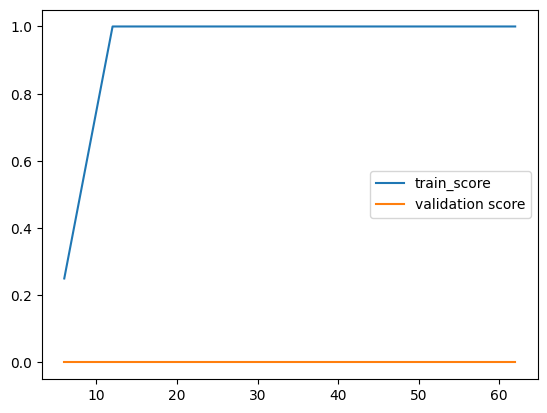

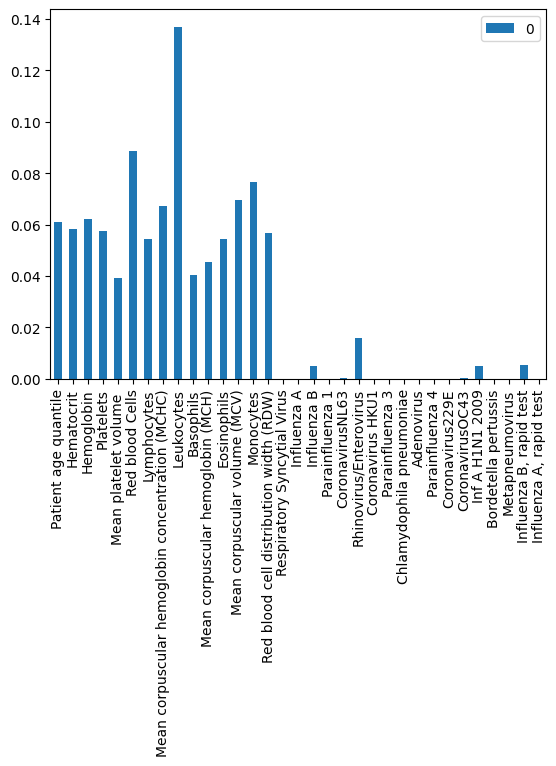

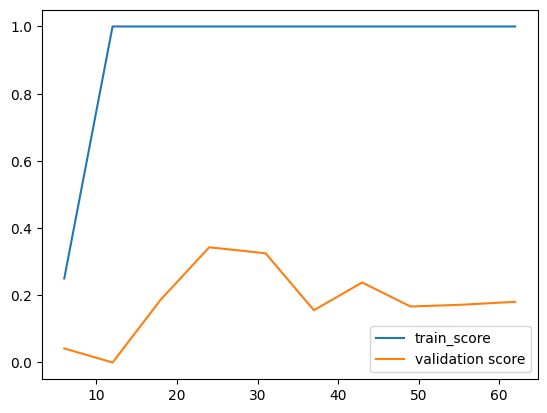

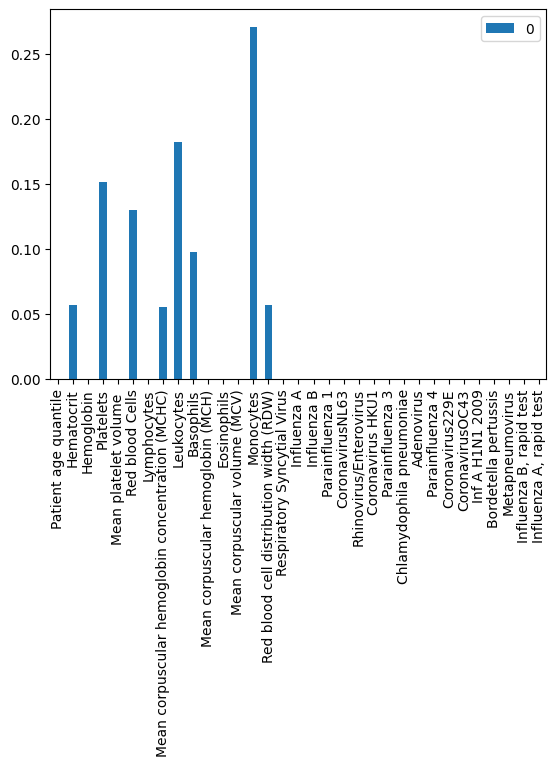

In [ ]:
models = [RandomForestClassifier(), DecisionTreeClassifier()]
les_modeles_a_train(models)


In [ ]:
print(pre_pocess(data,LogisticRegression(max_iter=1000)))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       0.00      0.00      0.00         3

    accuracy                           0.81        16
   macro avg       0.41      0.50      0.45        16
weighted avg       0.66      0.81      0.73        16

[[13  0]
 [ 3  0]]
None


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
print(pre_pocess(data,DecisionTreeClassifier(random_state=0)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       257
           1       0.75      0.26      0.39        23

    accuracy                           0.93       280
   macro avg       0.84      0.63      0.68       280
weighted avg       0.92      0.93      0.92       280

[[255   2]
 [ 17   6]]
None


In [ ]:
from sklearn.ensemble import RandomForestClassifier
print(pre_pocess(data,RandomForestClassifier()))

ValueError: ignored

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       257
           1       0.67      0.26      0.38        23

    accuracy                           0.93       280
   macro avg       0.80      0.62      0.67       280
weighted avg       0.92      0.93      0.91       280

[[254   3]
 [ 17   6]]
None


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [ ]:
def pre_pocess(data_set, model):
  data_set = data_set.fillna(0.0)
  y = data_set["SARS-Cov-2 exam result"]
  X = data_set.drop("SARS-Cov-2 exam result", axis = 1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 0)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))
  pd.Dataframe(model.feature_importances_, index=X_train.columns)

In [ ]:
print(pre_pocess(data,LogisticRegression(max_iter=1000)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1528
           1       0.76      0.10      0.17       166

    accuracy                           0.91      1694
   macro avg       0.84      0.55      0.56      1694
weighted avg       0.90      0.91      0.88      1694

[[1523    5]
 [ 150   16]]
None


In [ ]:
liste_drop = data.columns[data.isna().sum()/data.shape[0]*100 > 90].tolist()

In [ ]:
len(liste_drop)

72

In [ ]:
data = data.drop(liste_drop, axis = 1)

In [ ]:
data.shape

(5644, 37)

In [ ]:
data.select_dtypes('object').columns

Index(['SARS-Cov-2 exam result', 'Respiratory Syncytial Virus', 'Influenza A',
       'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63',
       'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella pertussis', 'Metapneumovirus', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [ ]:
for col in data.select_dtypes('object').columns:
  data[col] = data[col].map({"positive": 1, "negative": 0, "detected": 1, "not_detected": 0})


In [ ]:
data["SARS-Cov-2 exam result"].value_counts()

0    5086
1     558
Name: SARS-Cov-2 exam result, dtype: int64

In [ ]:
data.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

In [ ]:
list_drop = data.columns[data.isna().sum()/data.shape[0] > 0.9].tolist()

In [ ]:
data = data.drop(list_drop, axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 0)

In [ ]:
def rename(data_set, dico):
  for col in data_set.select_dtypes('object').columns:
    data_set[col] = data_set[col].map(dico)
  return data_set


dico = {'positive':1, 'negative':0, 'detected':1, 'not_detected':0}
train_set = rename(train_set, dico)

In [ ]:
train_set['SARS-Cov-2 exam result'].value_counts()

0    4068
1     447
Name: SARS-Cov-2 exam result, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
def imputation(data_set):
  return  data_set.dropna(axis = 0)

In [ ]:
def imputation(data_set):
  return  data_set.dropna(axis = 0)

def preprocess(data_set):
  data_set = imputation(data_set)
  X = data_set.drop('SARS-Cov-2 exam result', axis = 1)
  y = data_set['SARS-Cov-2 exam result']
  return X, y



In [ ]:
X_train, y_train = preprocess(train_set)
X_test, y_test = preprocess(test_set)

In [ ]:
X_train

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

ValueError: ignored

In [ ]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

ValueError: ignored

In [ ]:
i = 0
j = 20

while i < 20:
  print((j-1)*" ", (2*i+1)*"*")
  i+=1
  j-=1


                    *
                   ***
                  *****
                 *******
                *********
               ***********
              *************
             ***************
            *****************
           *******************
          *********************
         ***********************
        *************************
       ***************************
      *****************************
     *******************************
    *********************************
   ***********************************
  *************************************
 ***************************************


In [ ]:
def rename(data_set, dico):
    return data_set.select_dtypes('object').apply(lambda colonne: colonne.replace(dico))

dico = {'positive':1, 'negative':0, 'detected':1, 'not_detected':0}
test_set = rename(test_set, dico)

test_set.head()

,Patient ID,SARS-Cov-2 exam result,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
5113,"9,76533E+14",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2343,691e1faf7279e31,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2552,dc9e58ef818b1b5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
895,6d0410bcd9c9fd2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4762,115e4792196abf3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [ ]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})


In [ ]:
df

,A,B
0,1,4
1,2,5
2,3,6
